In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 家電  

## 洗濯機

### 時刻別消費電力量
$$
E_{ Elc, washer, d, t } =  E_{ Elc, washer, wash } \times tm_{ washer, wash, d, t } \times 10^{ -3 }
$$

$ E_{ Elc, washer, d, t } $：日付dの時刻tにおける洗濯機の消費電力量,kWh  
$ E_{ Elc, washer, wash } $：洗濯機の1回の洗濯の消費電力量,Wh  
$ tm_{ wahser, d, t } $：日付dの時刻tにおける洗濯機の洗濯回数,回  
$ 10^{ -3 } $：単位換算,Wh -> kWh

In [2]:
def get_E_Elc_washer_d_t(E_Elc_washer_wash_rtd, tm_washer_d_t):
    """時刻別消費電力量を計算する
    
    Parameters
    ----------
    E_Elc_washer_wash_rtd : float
        洗濯機の標準コースの洗濯の定格消費電力量,Wh

    tm_tv_led_view_d_t : ndarray(N-dimensional array)
        1年間の全時間の洗濯回数を格納したND配列, 回
        d日t時の洗濯回数が年開始時から8760個連続して格納されている
    
    Returns
    ----------
    E_Elc_toilet_seat_heater_d_t : ndarray(N-dimensional array)
        1年間の全時間の消費電力量を格納したND配列, Wh
        d日t時の消費電力量が年開始時から8760個連続して格納されている
    """
    E_Elc_washer_wash = get_E_Elc_washer_wash(E_Elc_washer_wash_rtd) 
    E_Elc_washer_d_t = E_Elc_washer_wash * tm_washer_d_t
    E_Elc_washer_d_t = E_Elc_washer_d_t * 10**(-3)
    
    return E_Elc_washer_d_t

### 動作別の消費電力

#### 洗濯時の消費電力量  
$$
E_{ Elc, washer, wash } =　1.3503 \times E_{ Elc, washer, wash, rtd } - 42.848
$$

$ E_{ Elc, washer, wash, rtd } $：洗濯機の標準コースの洗濯の定格消費電力量,Wh  

In [3]:
def get_E_Elc_washer_wash(E_Elc_washer_wash_rtd):
    """洗濯時の消費電力量を計算する
    
    Parameters
    ----------
    E_Elc_washer_wash_rtd : float
        洗濯機の標準コースの洗濯の定格消費電力量,Wh
        
    Returns
    ----------
    E_Elc_washer_wash : float
        洗濯機の1回の洗濯の消費電力量,Wh
    """

    E_Elc_washer_wash = 1.3503 * E_Elc_washer_wash_rtd - 42.848

        
    return E_Elc_washer_wash

## サンプル計算

### 家電スケジュールの読み込み
ここでは、サンプルデータをcsvファイルから読み込む

In [4]:
def import_schedule_1_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['洗濯機_4人世帯_洗濯']
    schedule_1_d_t = ds.values
    return schedule_1_d_t

#### 洗濯時の消費電力量

In [5]:
get_E_Elc_washer_wash(51)

26.017300000000006

### 時刻別消費電力量

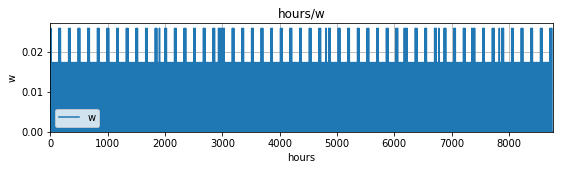

In [6]:
tm_washer_d_t = import_schedule_1_d_t()

x = np.arange(8760)
y = get_E_Elc_washer_d_t(51, tm_washer_d_t)

plt.figure(figsize=(9,2))
plt.subplot(1,1,1)
plt.plot(x, y, label="w")

plt.grid(True)

plt.title("hours/w")
plt.xlabel("hours")
plt.ylabel("w")

plt.xlim(0,8760)
plt.ylim(0,)

plt.legend()
plt.show()